In [1]:
from datetime import date
import tearsheet as ts
import ankitfinance as af
import fundamental_health_topis as tp
import talib
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels
warnings.filterwarnings('ignore')
%matplotlib inline

# Europe Analysis

## Factors Data

In [11]:
data_europe=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/Europe_3_Factors.csv",index_col=0,header=0,parse_dates=True)
data_europe.index=pd.to_datetime(data_europe.index)
data_europe=data_europe/100
data_europe.head(2)


,Mkt-RF,SMB,HML,RF
Date,,,,
1990-07-01,0.0446,0.0029,-0.0152,0.0068
1990-08-01,-0.1088,0.0018,-0.0030,0.0066


## Germany Returns

In [12]:
stock_data_germany=yf.download(tickers="BAS.DE",start='1990-07-01',period='1mo')[['Adj Close']]
stock_data_germany_returns=stock_data_germany.pct_change()
monthly_germany=stock_data_germany_returns.resample(rule='M').apply(af.compound)
monthly_germany=monthly_germany[0:-3]
data_europe=data_europe[monthly_germany.index[0]:]
data_europe=data_europe.drop(labels='RF',axis=1)
data_europe['Alpha']=1
data_europe.index=monthly_germany.index
model=sm.OLS(monthly_germany,data_europe)
fit=model.fit()

[*********************100%***********************]  1 of 1 completed


### Factors Model for Germany

In [13]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     12.81
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.85e-08
Time:                        12:28:11   Log-Likelihood:                 364.61
No. Observations:                 300   AIC:                            -721.2
Df Residuals:                     296   BIC:                            -706.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1465      0.083      1.759      0.080      -0.017       0.311
SMB            1.1091      0.190      5.843      0.000       0.736       1.483
HML            0.2733      0.156      1.753      0.081      -0.034       0.580
Alpha          0.0076      0.004      1.804      0.072      -0.001       0.016
==============================================================================
Omnibus:                        9.210   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               17.086
Skew:                           0.027   Prob(JB):                     0.000195
Kurtosis:                       4.168   Cond. No.                         45.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
Germany_Factors=fit.params

In [15]:
Germany_Factors

Mkt-RF    0.146548
SMB       1.109059
HML       0.273290
Alpha     0.007601
dtype: float64

# America's Analysis

## Factor Data

In [16]:
data_america=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/North_America_3_Factors.csv",index_col=0,header=0,parse_dates=True)

In [17]:
data_america=(data_america/100)

## American Returns

In [18]:
stock_america=yf.download(tickers='BASFY',start='1990-07-01',interval='1mo')[['Adj Close']]
stock_america.head(2)
stock_america_returns=stock_america.pct_change()
stock_america_returns
data_america=data_america[stock_america_returns.index[0]:]
stock_america_returns=stock_america_returns[0:-3]
k=pd.concat([stock_america_returns,data_america],axis=1)
k=k.dropna()
k['Alpha']=1

[*********************100%***********************]  1 of 1 completed


In [19]:
k=k.drop(labels='RF',axis=1)

In [20]:
k.head(3)

,Adj Close,Mkt-RF,SMB,HML,Alpha
Date,,,,,
1997-01-01,-0.052287,0.0497,-0.0145,-0.0154,1
1997-02-01,0.017241,-0.0036,-0.0346,0.0503,1
1997-03-01,0.003390,-0.0490,-0.0123,0.0387,1


### Factor Analysis

In [21]:
model_america=sm.OLS(k.iloc[:,0],k.iloc[:,1:])

In [22]:
fit_america=model.fit()

In [23]:
fit_america.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     12.81
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           6.85e-08
Time:                        12:28:19   Log-Likelihood:                 364.61
No. Observations:                 300   AIC:                            -721.2
Df Residuals:                     296   BIC:                            -706.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.1465      0.083      1.759      0.080      -0.017       0.311
SMB            1.1091      0.190      5.843      0.000       0.736       1.483
HML            0.2733      0.156      1.753      0.081      -0.034       0.580
Alpha          0.0076      0.004      1.804      0.072      -0.001       0.016
==============================================================================
Omnibus:                        9.210   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               17.086
Skew:                           0.027   Prob(JB):                     0.000195
Kurtosis:                       4.168   Cond. No.                         45.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
america_factors=fit_america.params

# Asia Pacific 

## Factor Data

In [25]:
data_asia=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/Asia_Pacific_ex_Japan_3_Factors.csv",index_col=0,header=0,parse_dates=True)
data_asia=data_asia/100

In [26]:
data_asia.head(4)

,Mkt-RF,SMB,HML,RF
Date,,,,
1990-07-01,0.0420,-0.0302,-0.0146,0.0068
1990-08-01,-0.0868,0.0317,0.0173,0.0066
1990-09-01,-0.0880,0.0403,-0.0006,0.0060
1990-10-01,-0.0195,-0.0518,-0.0148,0.0068


## Indian Returns

In [27]:
stock_india=yf.download(tickers='BASF.NS',start='1990-07-01',end='2021-12-01',interval='1mo')[['Adj Close']]
stock_india_returns=stock_india.pct_change()
frame=pd.concat([stock_india_returns,data_asia],axis=1).dropna()
frame['Alpha']=1
frame=frame.drop(labels='RF',axis=1)

[*********************100%***********************]  1 of 1 completed


In [28]:
frame.head(3)

,Adj Close,Mkt-RF,SMB,HML,Alpha
Date,,,,,
2002-08-01,0.069742,0.0003,0.0172,-0.0262,1
2002-09-01,-0.120346,-0.0740,-0.0072,-0.0084,1
2002-10-01,-0.072343,0.0455,-0.0308,0.0065,1


### Factor Analysis

In [29]:
model_india=sm.OLS(frame.iloc[:,0],frame.iloc[:,1:])

In [30]:
fit_india=model_india.fit()

In [31]:
fit_india.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     8.470
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           2.33e-05
Time:                        12:28:27   Log-Likelihood:                 204.24
No. Observations:                 233   AIC:                            -400.5
Df Residuals:                     229   BIC:                            -386.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5571      0.122      4.585      0.000       0.318       0.797
SMB            0.3728      0.258      1.443      0.150      -0.136       0.882
HML            0.2497      0.271      0.923      0.357      -0.283       0.783
Alpha          0.0160      0.007      2.362      0.019       0.003       0.029
==============================================================================
Omnibus:                        9.718   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.269
Skew:                           0.411   Prob(JB):                      0.00589
Kurtosis:                       3.619   Cond. No.                         42.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
india_factors=fit_india.params

In [33]:
india_factors

Mkt-RF    0.557141
SMB       0.372752
HML       0.249653
Alpha     0.016043
dtype: float64

# Cumulative 

In [79]:
india_factors

Mkt-RF    0.557141
SMB       0.372752
HML       0.249653
Alpha     0.016043
dtype: float64

In [80]:
Germany_Factors

Mkt-RF    0.146548
SMB       1.109059
HML       0.273290
Alpha     0.007601
dtype: float64

In [81]:
america_factors

Mkt-RF    0.146548
SMB       1.109059
HML       0.273290
Alpha     0.007601
dtype: float64

In [82]:
cumulative=pd.DataFrame(data=(india_factors,Germany_Factors,america_factors),index=['Asia-Pacific','Europe','America'])

# Cumulative Factor Based on Regions

In [85]:
cumulative=cumulative.T
weights=[0.20,0.60,0.20]
cumulative=cumulative*weights

In [86]:
Final=pd.DataFrame(cumulative.sum(axis=1),columns=['Factors'])

In [87]:
Final

,Factors
Mkt-RF,0.228667
SMB,0.961798
HML,0.268563
Alpha,0.009290


In [43]:
Final.index=['Market Factor','Size- Factor','Value Factor',"Alpha"]

In [44]:
Final

,Factors
Market Factor,0.228667
Size- Factor,0.961798
Value Factor,0.268563
Alpha,0.009290


In [136]:
kj=Final.drop(labels=['Alpha'],axis=0)

In [171]:
x=Final.iloc[0]
y=Final.iloc[1]
z=Final.iloc[2]

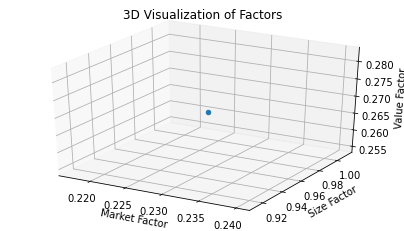

In [187]:
fig = plt.figure(figsize=(7,4))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x,y,z,) # plot the point (2,3,4) on the figure
ax.set_title("3D Visualization of Factors")
ax.set_xlabel("Market Factor")

ax.set_ylabel("Size Factor")

ax.set_zlabel("Value Factor")



plt.show()

# GDP Forecasting Model : Germany

### Model:  Support Vector Regression Model

In [111]:
from sklearn import svm

In [112]:
data_gdp=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/Germany_gdp_quarterly.csv")
data_cpi=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/Germany_cpi_quarterly.csv")
data_mnu=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/manufacturing_capacity_germany_quarterly.csv")
data_interest=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/Interest_rates_germany_quarterly.csv")
data_unemp=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/unemployement_rate_germany_quarterly.csv")
data_mnu=data_mnu[data_mnu['LOCATION']=='DEU']
data_cpi=data_cpi[data_cpi['LOCATION']=='DEU']
data_gdp=data_gdp[data_gdp['LOCATION']=='DEU']
data_interest=data_interest[data_interest['LOCATION']=='DEU']
data_unemp=data_unemp[data_unemp['LOCATION']=='DEU']
data_cpi=data_cpi[['TIME','Value']]
data_gdp=data_gdp[['TIME','Value']]
data_interest=data_interest[['TIME','Value']]
data_unemp=data_unemp[['TIME','Value']]
data_mnu=data_mnu[['TIME','Value']]
data_cpi.index=(data_cpi['TIME'])
data_cpi=data_cpi.drop(labels=['TIME'],axis=1)

data_unemp.index=(data_unemp['TIME'])
data_unemp=data_unemp.drop(labels=['TIME'],axis=1)

data_mnu.index=(data_mnu['TIME'])
data_mnu=data_mnu.drop(labels=['TIME'],axis=1)

data_interest.index=(data_interest['TIME'])
data_interest=data_interest.drop(labels=['TIME'],axis=1)

data_gdp.index=(data_gdp['TIME'])
data_gdp=data_gdp.drop(labels=['TIME'],axis=1)

In [113]:
frame_x=pd.concat([data_cpi,data_interest,data_mnu,data_unemp],axis=1)
frame_x=round(frame_x/100,3)
frame_x=frame_x.replace(to_replace=np.nan,value=0)
frame_y=round(data_gdp,4)

In [114]:
frame_x.columns=['CPI','Interest Rates','Manufacturing Capacity','Unemployement Rate']

#### Training Set : Independent Variable

In [115]:
frame_x.head(5)

,CPI,Interest Rates,Manufacturing Capacity,Unemployement Rate
2012-Q1,0.021,0.018,0.983,0.054
2012-Q2,0.019,0.014,0.980,0.054
2012-Q3,0.020,0.014,0.984,0.053
2012-Q4,0.020,0.014,0.961,0.053
2013-Q1,0.015,0.015,0.961,0.054


In [116]:
frame_y.columns=['GDP Rate']

#### Training Set : dependent Variable

In [117]:
frame_y.head(5)

,GDP Rate
TIME,
2012-Q1,0.8745
2012-Q2,1.7568
2012-Q3,4.0100
2012-Q4,0.6901
2013-Q1,0.4061


In [118]:
x=frame_x.pct_change().dropna()
y=frame_y.pct_change().dropna()
model_kk=svm.SVR()
fit=model_kk.fit(x,(frame_y/100)[:-2])

In [119]:
data_cpi_f=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/germany_inflation_forecast.csv")
data_mnu_f=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/germany_manufacturing_forecast.csv")
data_interest_f=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/germany_interest_forecast.csv")
data_unemp_f=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/gdp/germany_unemployement_forecast.csv")
data_mnu_f=data_mnu_f[data_mnu_f['LOCATION']=='DEU']
data_cpi_f=data_cpi_f[data_cpi_f['LOCATION']=='DEU']
data_interest_f=data_interest_f[data_interest_f['LOCATION']=='DEU']
data_unemp_f=data_unemp_f[data_unemp_f['LOCATION']=='DEU']
data_cpi_f=data_cpi_f[['TIME','Value']]
data_interest_f=data_interest_f[['TIME','Value']]
data_unemp_f=data_unemp_f[['TIME','Value']]
data_mnu_f=data_mnu_f[['TIME','Value']]

data_cpi_f.index=(data_cpi_f['TIME'])
data_cpi_f=data_cpi_f.drop(labels=['TIME'],axis=1)

data_unemp_f.index=(data_unemp_f['TIME'])
data_unemp_f=data_unemp_f.drop(labels=['TIME'],axis=1)

data_mnu_f.index=(data_mnu_f['TIME'])
data_mnu_f=data_mnu_f.drop(labels=['TIME'],axis=1)

data_interest_f.index=(data_interest_f['TIME'])
data_interest_f=data_interest_f.drop(labels=['TIME'],axis=1)



In [120]:
forecast_fame=pd.concat([data_cpi_f,data_interest_f,data_mnu_f,data_unemp_f],axis=1)
b=forecast_fame.pct_change().dropna()
gdp_change=pd.DataFrame(abs(fit.predict(b)))
gdp_change.columns=['Change']
gdp_change.index=b.index

### GDP Change in next 4 Quarters

In [122]:
forecast_fame.columns=['CPI','Interest Rates','Manufacturing Capacity','Unemployement Rate']

In [123]:
forecast_fame

,CPI,Interest Rates,Manufacturing Capacity,Unemployement Rate
TIME,,,,
2022-Q2,3.268061,-0.450909,5.320557,3.263605
2022-Q3,2.889810,-0.450909,4.786810,3.215386
2022-Q4,2.330073,-0.450909,3.662115,3.176781
2023-Q1,2.258883,-0.450909,3.070181,3.147803
2023-Q2,2.218216,-0.450909,2.866266,3.118811


In [232]:
gdp_change

,Change
TIME,
2022-Q3,0.018459
2022-Q4,0.021624
2023-Q1,0.004187
2023-Q2,0.006836


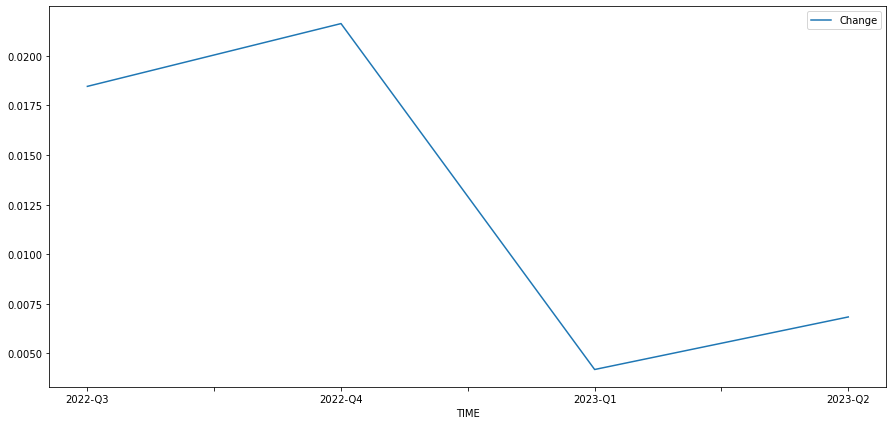

In [234]:
gdp_change.plot(figsize=(15,7))

### Forecasted GDP by 2023

In [235]:
GDP=3.80*(1+gdp_change).cumprod()
GDP.columns=['GDP']

### GDP

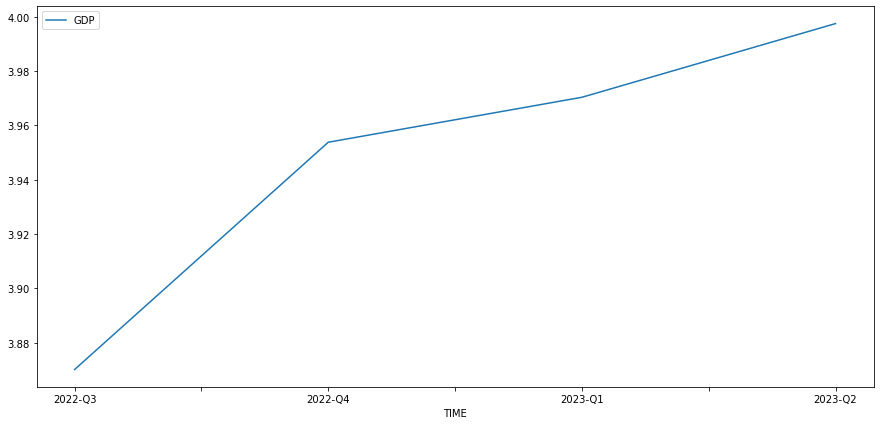

In [237]:
GDP.plot(figsize=(15,7))

In [374]:
GDP

,GDP
TIME,
2022-Q3,3.870143
2022-Q4,3.953829
2023-Q1,3.970384
2023-Q2,3.997525


# MSCI Europe Index Forecasting Model 

In [53]:
from statsmodels.tsa.arima.model import ARIMA
import datetime
index=pd.date_range(start=date.today(),end="2023-02-12",freq='m')

In [54]:
data_msci=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/MSCI Europe Historical Data.csv",index_col=0,header=0,parse_dates=True)[['Price']]
data_msci=data_msci.iloc[::-1]
model_arima=ARIMA(data_msci,order=(8,3,6))
fit_arima=model_arima.fit()
fit_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2504
Model:                 ARIMA(8, 3, 6)   Log Likelihood              -10570.453
Date:                Sun, 13 Feb 2022   AIC                          21170.907
Time:                        12:41:39   BIC                          21258.274
Sample:                    07-09-2012   HQIC                         21202.625
                         - 02-10-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -3.4709      0.064    -54.241      0.000      -3.596      -3.345
ar.L2         -4.8289      0.165    -29.210      0.000      -5.153      -4.505
ar.L3         -3.1199      0.170    -18.348      0.000      -3.453      -2.787
ar.L4         -0.7162      0.102     -7.035      0.000      -0.916      -0.517
ar.L5          0.0582      0.085      0.683      0.494      -0.109       0.225
ar.L6         -0.0332      0.075     -0.445      0.656      -0.179       0.113
ar.L7         -0.0368      0.049     -0.752      0.452      -0.133       0.059
ar.L8         -0.0116      0.015     -0.757      0.449      -0.042       0.018
ma.L1          1.5007      0.062     24.084      0.000       1.379       1.623
ma.L2         -1.0350      0.037    -28.276      0.000      -1.107      -0.963
ma.L3         -3.0486      0.100    -30.356      0.000      -3.245      -2.852
ma.L4         -0.8251      0.094     -8.754      0.000      -1.010      -0.640
ma.L5          1.5111      0.043     34.953      0.000       1.426       1.596
ma.L6          0.8973      0.056     16.109      0.000       0.788       1.006
sigma2       268.1442      3.771     71.108      0.000     260.753     275.535
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             11471.85
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.72   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

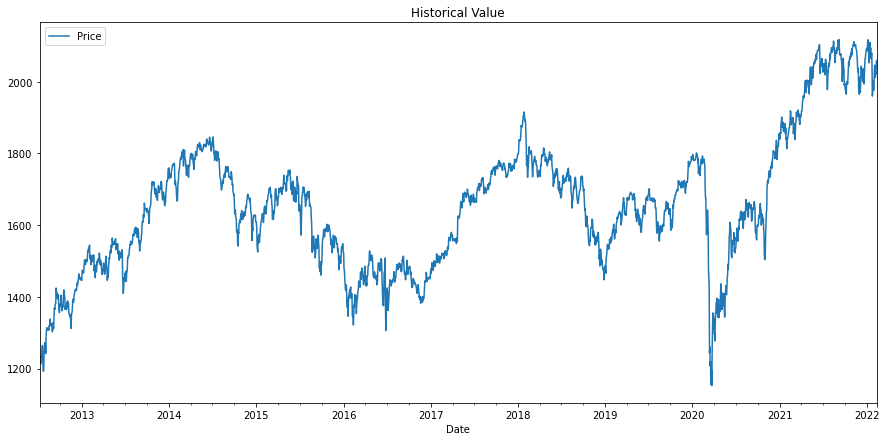

In [133]:
data_msci.plot(figsize=(15,7),title='Historical Value')


In [59]:
forecast=pd.DataFrame(data=fit_arima.forecast(steps=12))

In [102]:
forecast.index=index
forecast.columns=['Forecasted Price Value']

In [124]:
forecast

,Forecasted Price Value
2022-02-28,2061.081328
2022-03-31,2062.265026
2022-04-30,2062.345097
2022-05-31,2064.928758
2022-06-30,2063.781678
2022-07-31,2067.515446
2022-08-31,2065.994848
2022-09-30,2069.327759
2022-10-31,2068.834916
2022-11-30,2070.819680


###  Forecasted Value

In [103]:
((1+forecast.pct_change()).prod()-1)*100

Forecasted Price Value    0.561826
dtype: float64

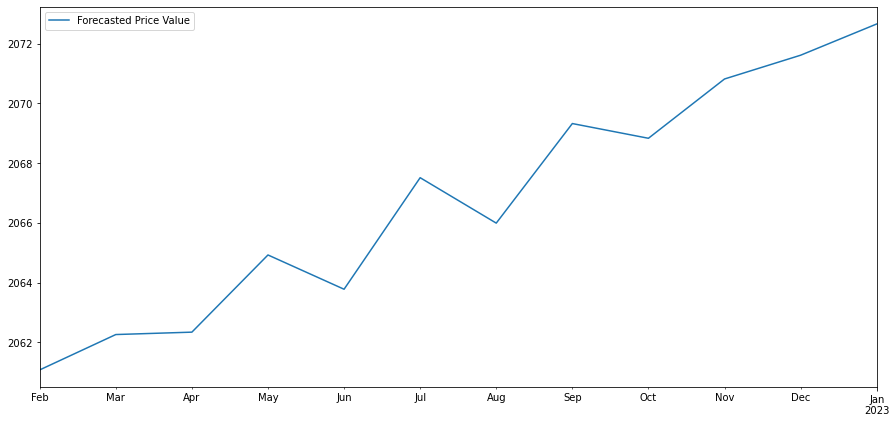

In [104]:
forecast.plot(figsize=(15,7))

# Euribor Forecastng

In [46]:
data_euribor=pd.read_csv("D:Msc-Finance/SEM-2/Asset_management/Asset_Report/euribor.csv.",index_col=0,header=0,parse_dates=True)


#### Smoothing the Time Series using Dynamic Exponential Moving Avergae

In [47]:
smooth=pd.DataFrame(talib.DEMA(data_euribor['Value']))
smooth.columns=['Smoothen Time Series']

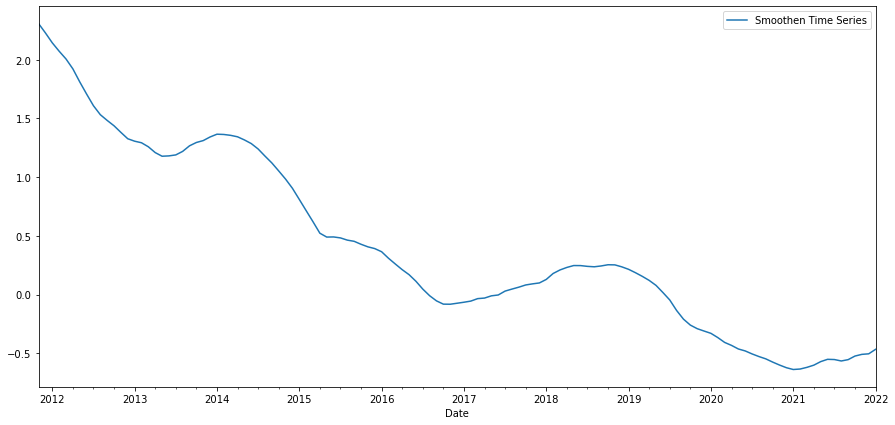

In [48]:
smooth.dropna().plot(figsize=(15,7))

### ARIMA Model (p,d,q)

In [49]:
model_euri=ARIMA(smooth,order=(2,1,3))

In [50]:
fit_euribor=model_euri.fit()

In [105]:
fit_euribor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     Smoothen Time Series   No. Observations:                  181
Model:                   ARIMA(2, 1, 3)   Log Likelihood                 334.734
Date:                  Sun, 13 Feb 2022   AIC                           -657.469
Time:                          13:30:56   BIC                           -638.311
Sample:                      01-01-2007   HQIC                          -649.701
                           - 01-01-2022                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3917      0.379      1.034      0.301      -0.351       1.134
ar.L2          0.5017      0.337      1.489      0.136      -0.158       1.162
ma.L1          0.8834      0.388      2.275      0.023       0.122       1.644
ma.L2          0.0885      0.256      0.346      0.729      -0.413       0.589
ma.L3         -0.1935      0.130     -1.494      0.135      -0.447       0.060
sigma2         0.0002    2.5e-05      8.344      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               106.50
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              15.72   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
k=pd.DataFrame(fit_euribor.forecast(steps=12))
k.columns=['Forecasted Interest Rates']

In [52]:
k

,Forecasted Interest Rates
2022-02-01,-0.418397
2022-03-01,-0.377658
2022-04-01,-0.343463
2022-05-01,-0.309628
2022-06-01,-0.279216
2022-07-01,-0.250326
2022-08-01,-0.223750
2022-09-01,-0.198843
2022-10-01,-0.175752
2022-11-01,-0.154210


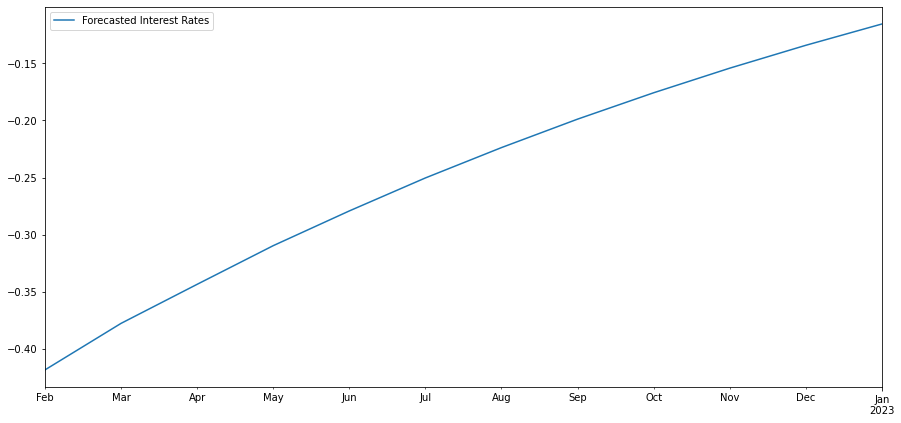

In [96]:
k.plot(figsize=(15,7))

## Subjective Returns

In [99]:
monthly=stock_data_germany_returns.resample(rule='M').apply(af.compound)

In [101]:
af.annualdata(monthly)

,Monthly Returns,Annual Returns,Annual Volatility,Monthly Volatility,Sharpe Ratio,Sortino Ratio,Doubling Index
Adj Close,0.796876,9.992956,0.264141,0.076251,0.189026,0.303351,7.205075
